In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# 激活函数修改为selu
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.01),
              metrics = ["accuracy"])

In [16]:
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=50,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6567 - accuracy: 0.7664 - val_loss: 0.4311 - val_accuracy: 0.8468
Epoch 2/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4996 - accuracy: 0.8211 - val_loss: 0.3916 - val_accuracy: 0.8532
Epoch 3/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4479 - accuracy: 0.8397 - val_loss: 0.3786 - val_accuracy: 0.8648
Epoch 4/50
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4230 - accuracy: 0.8475 - val_loss: 0.3489 - val_accuracy: 0.8736
Epoch 5/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4030 - accuracy: 0.8551 - val_loss: 0.3552 - val_accuracy: 0.8724
Epoch 6/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3826 - accuracy: 0.8630 - val_loss: 0.3251 - val_accuracy: 0.8842
Epoch 7/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3683 - accuracy: 0.8677 - val_loss: 0.3325 - val_ac

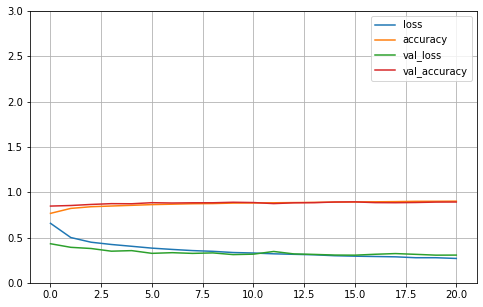

In [19]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

In [18]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3467925488948822, 0.8794000148773193]